# Music Through The Ages: What Makes A Hit?
##### Julie Lee, Julia Bernstein, Nandan Aggarwal

## Introduction

The music industry is incredibly oversaturated, with thousands of songs being released daily. Thus, it is commonplace for songs to get “lost” in the sea of new music, unable to capture the attention of the masses. 

However, once in a while a song is able to slip through the cracks, and gain wide-spread recognition. While these hit songs do not always share explicit similarities, we wanted to conduct a more thorough analysis to better understand what made these songs a hit. Do these songs share certain characteristics? Is there a formula for commercial music success?

Billboard and Spotify are two very different music companies, but both have their own ways of rating music on a weekly basis. We wanted to find out if their rating systems worked in similar ways, or if they differed, what made them different?

To conduct our analysis, we used audio data (via Spotify) and charting data (via Billboard.com) of the weekly Hot 100 singles chart from 8/2/1958 and 12/28/2019. We decided to use only the data from 2005 to 2015, to keep our data concise.

In terms of our broader research, we had two goals. Firstly, we decided to analyze the common characteristics amongst songs that reach the top 10 on the Billboard Hot 100. More specifically, we looked into what the common characteristics were between the songs that maintained their top 10 position on the Billboard Hot 100 for over 15* weeks. Secondly, we wanted to analyze the correlation between the number of weeks on the Billboard Hot 100 chart and the highest position on the Hot 100. We also looked into whether there was a correlation between Spotify's `popularity` attribute and `peak_position` from the Billboard data.


<em> *this number was later adjusted based on our exploratory analysis</em>

### Key Terms

Information about the key terms of our project is crucial to understanding the conclusions drawn at the end of our analysis.

The Spotify dataset that we used for this project quantifies several different musical features in unique ways. To understand these features, we looked into Spotify's web [API Documentation](https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-audio-features) for a thorough understanding of the proceses that the algorithm uses to analyze and quantify songs. 

- `popularity`:
The Spotify Track Popularity score is measured on a scale of 0 (least popular) to 100 (most popular). This score is calculated based on the total amount of plays on a given song, and how recent the plays are.

- `peak_position`:
Peak Position is the highest position a song reached on the Billboard Hot 100 chart, where a lower number signifies a higher charting position from 1 to 100.

- `danceability`:
This is a score that is assigned to a song based on how suitable it is for dancing. This score is measured on a scale of 0.0 to 1.0, and it is determined based on numerous musical components (e.g. beat strength, tempo, and regularity). 

- `energy`:
Energy quantifies the intensity of a given song, and it is measured on a scale of 0.0 to 1.0. Energetic tracks can be described as feeling loud, noisy, and fast. While energy seems comparable to danceability, it is different because a song can feel energetic without being danceable (because of a weak beat for example). 

- `acousticness`:
Acousticness quantifies the degree to which the algorithm believes that a song was recorded without effects or electronic instruments (a.k.a acoustically). This is measured on a scale of 0.0 to 1.0, with 1.0 representing high confidence that a song is acoustic.


- `valence`:
Valence quantifies how "positive" a song is, and it is measured on a scale of 0.0 to 1.0. Songs that sound more positive (e.g. cheerful, happy) will have a high valence score. On the other hand, songs that sound more negative (e.g. depressed, angry) will have a low valence score.

- `tempo`:
Tempo is the pace that a given song is played at, and it is measured in beats per minute (BPM).

### Research Questions
<ol>
    <li>How do different characteristics of a song affect its popularity?</li>
    <li>How does song popularity affect charting position on the Billboard 100?</li>
</ol>

### Summary of Findings

After conducting our research, we have concluded that there is in fact a correlation between peak position on the Billboard chart and popularity on Spotify. We also found that there was a correlation between the amount of weeks on chart and the peak position of a song. 

Additionally, after conducting our analyses, we realized that the most important characteristics for a song to reach the top 10 of the Billboard chart are high danceability, high valence, and low acousticness. However, for songs that lasted over one year and reached the top 10, we found that these characteristics were slightly modified. This included: lower danceability, lower valence, and higher acousticness.
___ 

## Data Description

The dataset that we created merges two existing datasets: one that contains information on every weekly Hot 100 singles chart from Billboard.com (from 8/2/1958 and 12/28/2019), and one that highlights the various audio features of these Hot 100 singles (collected via Spotify). We could not find specific information about the funding on this dataset, and it seems as though the creation of this dataset was not funded by any particular source. Furthermore, this data is not from a biased source, and it was 
collected via Spotify and Billboard Chart data exclusively. In our dataset, the observations are individual songs and the attributes are different ways of identifying a song. Originally, there were rows with missing data, which we got rid of during our data cleaning. This data was not confidential, as Spotify and Billboard data is public. This dataset is related to people in that popularity is determined by the amount of streams a song has on Spotify.

### Data Cleaning


Firstly, we imported our two datasets from [data.world](https://data.world/kcmillersean/billboard-hot-100-1958-2017). The first dataset, which we saved under the name "dfHS," was a .csv file named Hot Stuff.csv. This file contains all 100 songs on the Billboard Hot 100 for each week ranging from 8/2/1958 and 12/28/2019. The other dataset, which we saved under the name "df100," was orginally a .xlsx (Excel) file named Hot 100 Audio Features.xlsx. This file contains characteristics for each song that reached the Billboard Hot 100, pulled directly from Spotify. 

We added a  "Year" column to dfHS so that we could manipulate the datetime objects for easier use. We also limited our dataframe to the data in between 2005 and 2015 and dropped unneccesary columnns from dfHS, which we felt would not help us with our research questions. We also multiplied small values (those on a 0 to 1 scale) by 100 for a more accurate data visualization when comparing with other attributes ranked out of 100.

We grouped the Hot Stuff data by 'SongID' to get groups of each occurance of a particular song. For example, if a song charted for 30 weeks, there will be 30 occurances of that song in one group. We then created a new dataframe, minimums. In minimums, we found the index of the grouped song where it reached its peak position, in order to only keep that particular occurance. We also wanted to find the last week the song charted, so that we could find the total number of weeks that the song remained in the Hot 100.

We create an updated dataframe, `dfHS_update`, which only contains each song once (at its peak). We achieved this by creating an array called minimums, which contained the indices of the songs at their peak position (<strong> NOTE: </strong> we use idxmin because in the context of the Billboard chart, a lower number indicates a higher position). 

We then drop the old "weeks on chart" column in `dfHS_update`, which contains the week that a song peaked, which is not necessarily the total amount of weeks that it spent on the Hot 100, therefore making it unnecessary to our research.
- For example, a song might peak in its 6th week, fall to a lower position, but remain on the chart for 10 additional weeks. 

Thus, we wanted to keeep the total number of weeks that a song spent on the chart, which we did by checking the song's max number of weeks on chart, putting this in a new dataframe, and then merging it with the updated dataframe on SongID.

We decided to merge "df100" and the updated "dfHS" (dfHS_updated) into one dataset called "final_df." To do so, we matched the two datasets by their "SongID" element, dropped null values and repeated columns, and reset the index. 

Our final step in our cleaning is adding a true false column for songs that ever broke into the top 10.

### External links to datasets, if necessary

- [Billboard Data](https://drive.google.com/file/d/1zO4aQl2Ha9dY4I3IAfkaNXVgIgNRHqm0/view?usp=sharing)

- [Spotify Data](https://drive.google.com/file/d/1aN9Hjne4ogwlwEKaE3slTzJxNNCeYly1/view) 
___ 

## Preregistration

### Questions

1. Which characteristics are common amongst songs that reach the top 10 of the Billboard Hot 100, from 2005 to 2015? Of those that do reach the top 10, what characteristics are common between those that last longer than 15 weeks on the top 10 of the Billboard Hot 100?
2. How is number of weeks on the Billboard Hot 100 chart correlated to highest position on the Hot 100? Is Spotify track popularity correlated to the Billboard charting position?

### Explanation

#### Analysis #1

We decided to analyze the characteristics that are most common amongst the top 10 songs to help us get closer to the answer of our first research question, which was "How do different characteristics of a song affect its popularity?"

We chose to analyze songs from 2005 to 2015 because we wanted to narrow down our data to a solid 10 years, so that our analysis would be more concise and the trends that we notice would be more specific, and would help us gain insight on our second research question: How does a charting song’s characteristics change over time? 

#### Analysis #2

When looking at our dataset, we wanted to analyze whether or not there was a correlation between highest Billboard position and number of weeks charting, because from our knowledge of popular music, we expect there to be a positive correlation between these two.

Because we combined two sets of data, we are interested in seeing the correlation between the Spotify popularity and the highest Billboard position.
___ 

## Exploratory Data Analysis

#### Importing Resources

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans
from scipy.stats import ttest_ind
sns.set(rc={'figure.figsize':(11.7,8.27)})

We import our dataframe after cleaning it

In [280]:
df = pd.read_csv('cleaned.csv', index_col = 0)

We cast the true/false column from boolean to string for processing purposes.

In [281]:
df['top10'] = df['top10'].astype(str)

We create a new dataframe, top10, which includes only the songs that reached top 10 of the Billboard Hot 100 data

In [282]:
top10 = df[df["peak_position"] <= 10]
top10.head()

,song_id,duration_mins,popularity,danceability,energy,acousticness,valence,tempo,song,performer,peak_position,year,total_charting_weeks,top10
0,ApplauseLady Gaga,3.538883,71.0,66.9,78.0,2.65,73.8,139.945,Applause,Lady Gaga,4.0,2013,23.0,True
1,Story Of My LifeOne Direction,4.091550,81.0,60.0,66.3,22.50,28.6,121.070,Story Of My Life,One Direction,6.0,2013,32.0,True
2,"Bang BangJessie J, Ariana Grande & Nicki Minaj",3.323100,79.0,70.6,78.6,26.00,74.9,150.035,Bang Bang,"Jessie J, Ariana Grande & Nicki Minaj",3.0,2014,31.0,True
3,"Sorry, Blame It On MeAkon",4.928667,59.0,71.3,64.3,27.60,50.8,176.079,"Sorry, Blame It On Me",Akon,7.0,2007,19.0,True
4,Strange CloudsB.o.B Featuring Lil Wayne,3.771550,61.0,53.1,66.5,6.07,80.0,73.726,Strange Clouds,B.o.B Featuring Lil Wayne,7.0,2011,20.0,True


We compare the means and standard deviations of our top 10 dataframe and our overall dataframe

In [283]:
# Calculating the mean of our entire dataframe
df.mean()

duration_mins              3.809332
popularity                55.699584
danceability              60.814495
energy                    71.151858
acousticness              15.732379
valence                   51.520499
tempo                    123.821039
peak_position             49.125153
year                    2010.119775
total_charting_weeks      13.401613
dtype: float64

In [284]:
# Calculating the mean of our top 10 data
top10.mean()

duration_mins              3.866206
popularity                67.169811
danceability              66.326072
energy                    70.897256
acousticness              11.963384
valence                   55.014151
tempo                    120.590295
peak_position              4.888508
year                    2009.566038
total_charting_weeks      28.804460
dtype: float64

In [285]:
# Calculating the standard deviation of our entire dataframe
df.std()

duration_mins            0.618548
popularity              13.444660
danceability            14.433705
energy                  17.078384
acousticness            21.123898
valence                 21.901658
tempo                   29.252688
peak_position           30.197159
year                     3.135073
total_charting_weeks    11.204709
dtype: float64

In [286]:
# Calculating the standard deviation of our top10 dataframe
top10.std()

duration_mins            0.556585
popularity              11.334510
danceability            13.918732
energy                  15.523981
acousticness            17.927778
valence                 21.205943
tempo                   26.783781
peak_position            3.090211
year                     3.202020
total_charting_weeks    11.354769
dtype: float64

### Initial Scatterplots
We created a few scatterplots to explore the relationships between key aspects of the songs

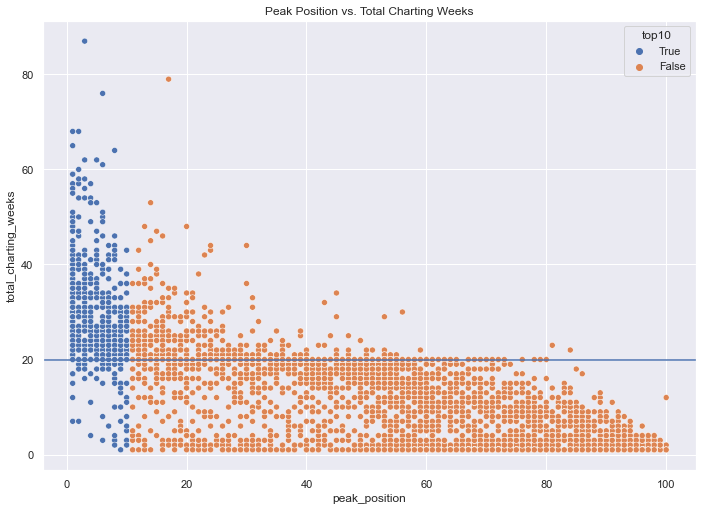

In [287]:
# Scatterplot between peak position and total charting weeks
# Blue plot points are top 10 data
sns.scatterplot(data = df, x = 'peak_position', y = 'total_charting_weeks', hue = 'top10')
plt.title("Peak Position vs. Total Charting Weeks")
plt.axhline(20)
plt.show()

<strong> NOTE: </strong>  We were a bit confused as to why there was such a harsh cutoff at approximately 20 total charting weeks. Upon [further investigation](https://en.wikipedia.org/wiki/Billboard_Hot_100), we found out that the reason for this cutoff is due to a component of Billboard's algorithm. Essentially, a song is permanently moved to "Recurrent Status" if it has spent 20 weeks on the Hot 100 and fallen below the position number 50. If it achieves this status, the song is removed from the top 100 chart. We added a line to show where this cutoff occurs.


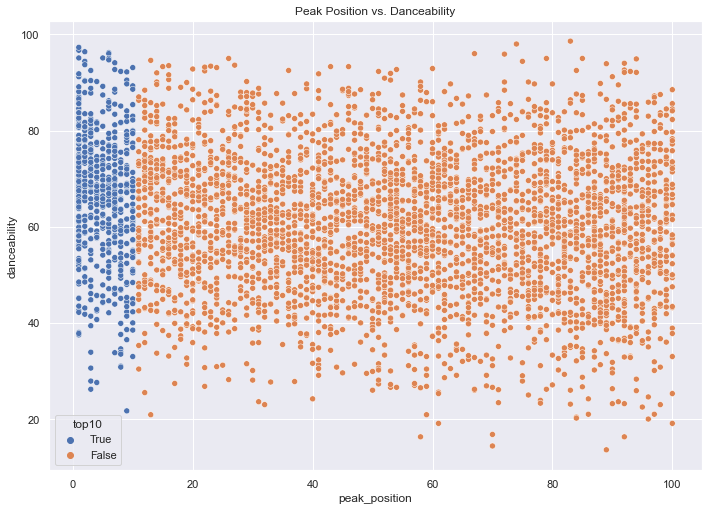

In [288]:
# Scatterplot between peak position and danceability
# Blue plot points are top 10 data
sns.scatterplot(data = df, x = 'peak_position', y = 'danceability', hue = 'top10')
plt.title("Peak Position vs. Danceability")
plt.show()

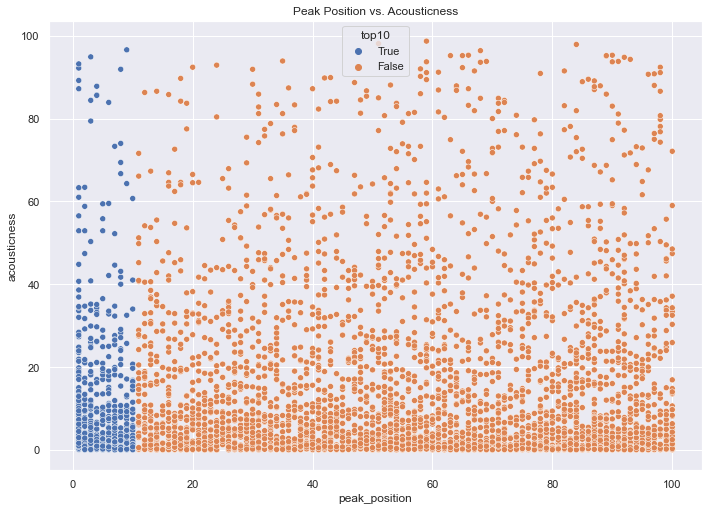

In [289]:
# Scatterplot between peak position and acousticness
# Blue plot points are top 10 data
sns.scatterplot(data = df, x = 'peak_position', y = 'acousticness', hue = 'top10')
plt.title("Peak Position vs. Acousticness")
plt.show()

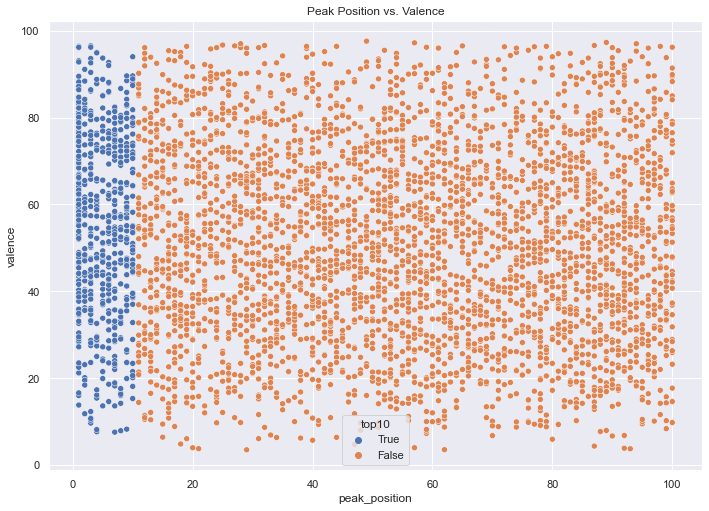

In [290]:
# Scatterplot between peak position and valence
# Blue plot points are top 10 data
sns.scatterplot(data = df, x = 'peak_position', y = 'valence', hue = 'top10')
plt.title("Peak Position vs. Valence")
plt.show()

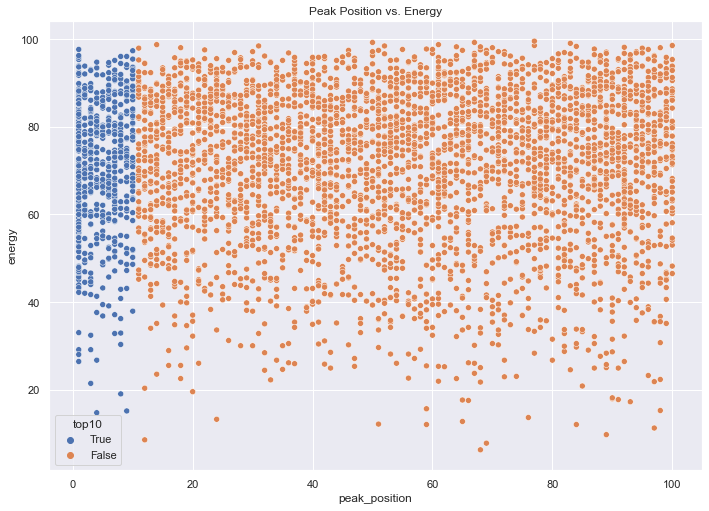

In [291]:
# Scatterplot between peak position and energy
# Blue plot points are top 10 data
sns.scatterplot(data = df, x = 'peak_position', y = 'energy', hue = 'top10')
plt.title("Peak Position vs. Energy")
plt.show()

## Analysis #1: Clustering Songs by Characteristics
### Part 1: Songs in top 10

From our exploratory analysis, we have decided that the variables we want to focus on in the first part in our first analysis are: `danceability`, `acousticness`, and `valence`, because these are all attributes of Spotify songs that had a difference of means that was greater than 4 units between the top10 dataframe and the overall dataframe. Thus, we decided not to analyze energy, liveness, or tempo. The attributes of `peak_position` and `popularity` will be analyzed in our second analysis.

We wanted to see if we could identify/predict a top 10 song based on the values of acousticness, danceability, and valence. Thus, we used clustering to see if we could accurately predict a song's chart position based on these values.

In [292]:
# function that creates clusters, prints cluster centers, and returns scatterplot with clusters
def cluster(x, y, k, df, hue):
    clustering = KMeans(n_clusters = k, random_state = 15)
    clustering.fit(df[[x, y]])
    df['cluster_label'] = clustering.labels_
    print("Cluster Centers:", "\n", clustering.cluster_centers_)
    sns.scatterplot(data = df, x = x, y = y,
                hue = hue, style = 'cluster_label', s = 80, alpha = 0.6)
    plt.title(x + " vs. " + y)
    return plt.show()

In [293]:
# function to determine accuracy of clustering
def accuracy(table):
    df_lookup = pd.DataFrame({"cluster_label": [0, 1],
                                        "predicted": ["True", "False"]})
    top10_predict = pd.merge(table, df_lookup, on = 'cluster_label')
    correct_pred = top10_predict.where(top10_predict['top10'] == top10_predict['predicted']).dropna().shape[0]
    accuracy = (correct_pred)/(top10_predict.shape[0]) * 100
    print('Accuracy of Prediction:', round(accuracy, 2), '%')

We assume that cluster 0 corresponds with the value "true" (in the top 10) and cluster 1 corresponds with the value "false" (not in top 10). 

#### Acousticness vs. Danceability

Cluster Centers: 
 [[55.75107914 55.6571223 ]
 [ 7.54245028 61.86996466]]


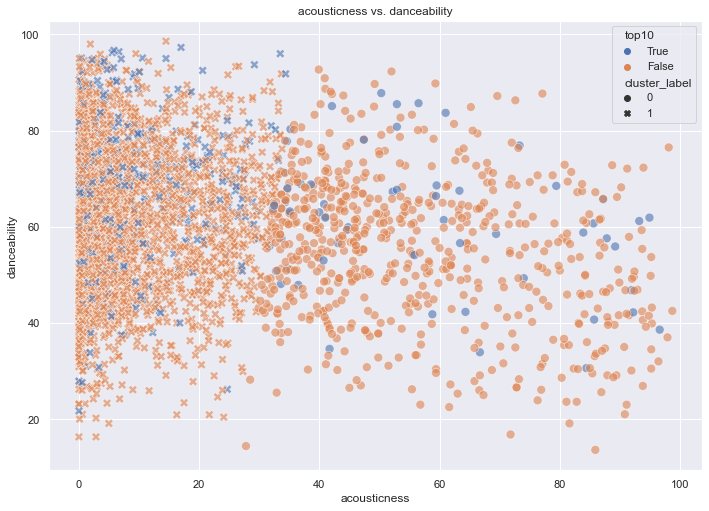

In [294]:
cluster('acousticness', 'danceability', 2, df, 'top10')

In [295]:
accuracy(df)

Accuracy of Prediction: 71.6 %


Based on this graph and the corresponding accuracy prediction percentage, our cluster and accuracy functions were able to predict whether or not a song would be in the top 10 cluster or not based on its acousticness 71.6% of the time. As seen in this plot, it seems as though a lower acousticness is associated with songs that were higher on the chart (in the top 10).

#### Danceability vs. Valence

Cluster Centers: 
 [[67.15911736 69.55984481]
 [54.3666831  33.18775752]]


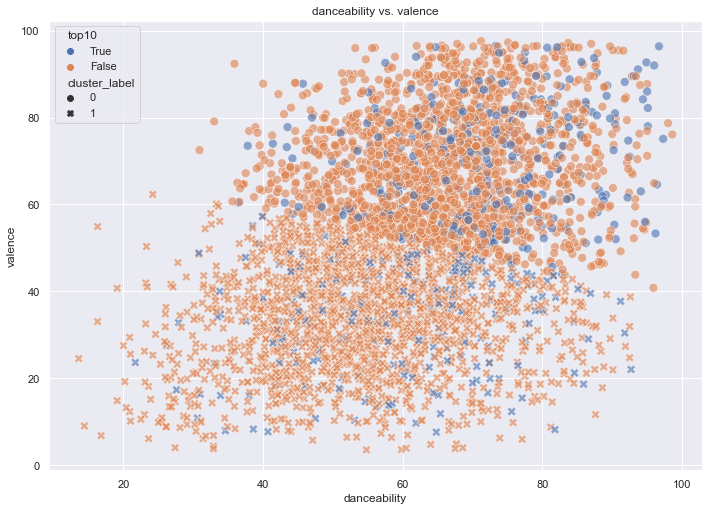

In [296]:
cluster('danceability', 'valence', 2, df, 'top10')

In [297]:
accuracy(df)

Accuracy of Prediction: 52.26 %


Based on this graph and the corresponding accuracy prediction percentage, our cluster and accuracy functions were able to predict whether or not a song would be in the top 10 cluster or not based on its danceability 52.26% of the time. This not a high enough accuracy percentage to determine whether or not a song is in the top 10 based on danceability alone. However, when looking at the plot, it seems as though a higher danceability is associated with a higher charting position (closer to top 10), although our clustering does not conclusively reflect this.

#### Acousticness vs. Valence

Cluster Centers: 
 [[ 9.2148097  68.33700278]
 [23.03719159 32.67276309]]


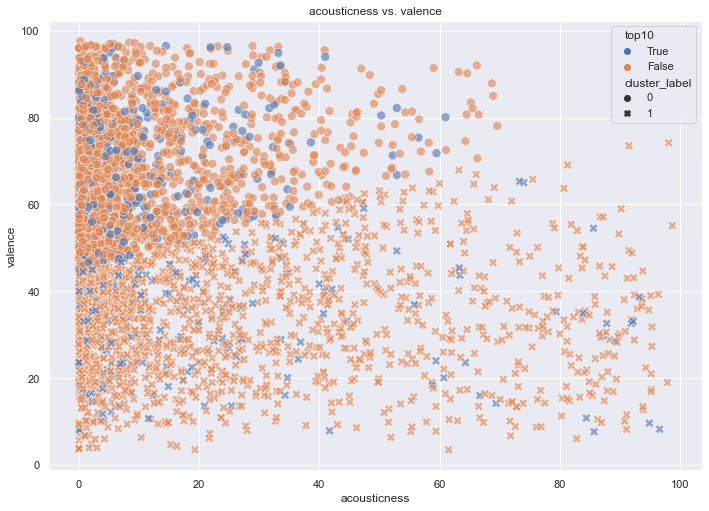

In [298]:
cluster('acousticness', 'valence', 2, df, 'top10')

In [299]:
accuracy(df)

Accuracy of Prediction: 50.79 %


Based on this graph and the corresponding accuracy prediction percentage, our cluster and accuracy functions were able to predict whether or not a song would be in the top 10 cluster or not based on its acousticness 50.79% of the time. This not a high enough accuracy percentage to determine whether or not a song is in the top 10 based on acousticness alone. However, when looking at the plot, it seems as though a lower acousticness is associated with a higher charting position (closer to top 10), although our clustering does not conclusively reflect this.

### Evaluation of Significance for Analysis 1, Part 1 (top 10 data)

Null Hypothesis: characteristic x and characteristic y are not associated.

Alternative Hypothesis: there is an association between characteristic x and characteristic y.

In [300]:
# Because t-tests require 2 independent samples, we created a new dataset to prevent overlap.
not_top10 = df[df["peak_position"] > 10]

In [301]:
cat1 = not_top10['danceability']
cat2 = top10['danceability']
print("T Test P-Value: " , ttest_ind(cat1, cat2)[1])

T Test P-Value:  1.2958298022907681e-23


In [302]:
cat1 = not_top10['acousticness']
cat2 = top10['acousticness']
print("T Test P-Value: " , ttest_ind(cat1, cat2)[1])

T Test P-Value:  3.1983911966188753e-06


In [303]:
cat1 = not_top10['valence']
cat2 = top10['valence']
print("T Test P-Value: " , ttest_ind(cat1, cat2)[1])

T Test P-Value:  3.141473167589496e-05


Given that the p-values for danceability, acousticness, and valence are below .05, and are extremely close to 0, we reject the null hypothesis. Thus, it is clear that the values of danceability, acousticness, and valence each have an affect on whether or not a song reaches the top 10. <strong> These significance metrics confirm the speculations that we had based on our clustering data that a song is more likely to be in the top 10 if it has higher danceability, lower acousticness, and higher valence.  </strong>

## Part 2: Songs that charted for longer than 20 weeks
<strong> NOTE: </strong> We originally chose an arbitrary number (15 weeks) to analyze in our pre-registered analysis. However, in our exploratory analysis above, we determined that 20 weeks was an interesting number to analyze, as this is the cutoff point for a song to achieve "Reccurent Status." Thus, we decided to alter our pre-registered analysis to reflect this discovery.

We create a subset of data containing songs from the top10 dataframe that charted for over 20 weeks.

In [304]:
over20weeks = top10[top10["total_charting_weeks"] >= 20]

In [305]:
print('Top 10 Songs that Lasted Over 20 Weeks Means', '\n', over20weeks.mean(), '\n')
print('All Top 10 Songs Means', '\n', top10.mean())

Top 10 Songs that Lasted Over 20 Weeks Means 
 duration_mins              3.869484
popularity                68.241379
danceability              66.550000
energy                    70.795019
acousticness              11.517389
valence                   55.049425
tempo                    120.533034
peak_position              4.666667
year                    2009.540230
total_charting_weeks      30.695402
dtype: float64 

All Top 10 Songs Means 
 duration_mins              3.866206
popularity                67.169811
danceability              66.326072
energy                    70.897256
acousticness              11.963384
valence                   55.014151
tempo                    120.590295
peak_position              4.888508
year                    2009.566038
total_charting_weeks      28.804460
dtype: float64


After printing out the means of the songs that were in the top 10 and charted for over 20 weeks vs. the entire dataframe of only top 10 songs, it appeared that there was almost no  difference between the means of both datasets.

Thus, we decided to do additional statistical analysis on the subset of data that charted for over 1 year, or 52 weeks.

### Part 2 (cont.): Testing over 1 year

In [306]:
over1year = top10[top10["total_charting_weeks"] >= 52]

In [307]:
print('Top 10 Songs that Lasted Over 1 Year Means', '\n', over1year.mean(), '\n')
print('All Top 10 Songs Means', '\n', top10.mean())

Top 10 Songs that Lasted Over 1 Year Means 
 duration_mins              3.846446
popularity                76.423077
danceability              61.250000
energy                    66.076923
acousticness              21.615923
valence                   49.738462
tempo                    119.552077
peak_position              3.000000
year                    2011.615385
total_charting_weeks      60.230769
dtype: float64 

All Top 10 Songs Means 
 duration_mins              3.866206
popularity                67.169811
danceability              66.326072
energy                    70.897256
acousticness              11.963384
valence                   55.014151
tempo                    120.590295
peak_position              4.888508
year                    2009.566038
total_charting_weeks      28.804460
dtype: float64


By comparing these means, we have decided that the variables that showed promising differences in this subset were: `danceability`, `acousticness`, `valence`, and `energy`, because these are all attributes of Spotify songs that had a difference of means that was greater than 4 units between the over 1 year subset and the top10 subset. Thus, we decided not to analyze liveness or tempo.

We use boxplots to visually demonstrate the distributions and means of these attributes.

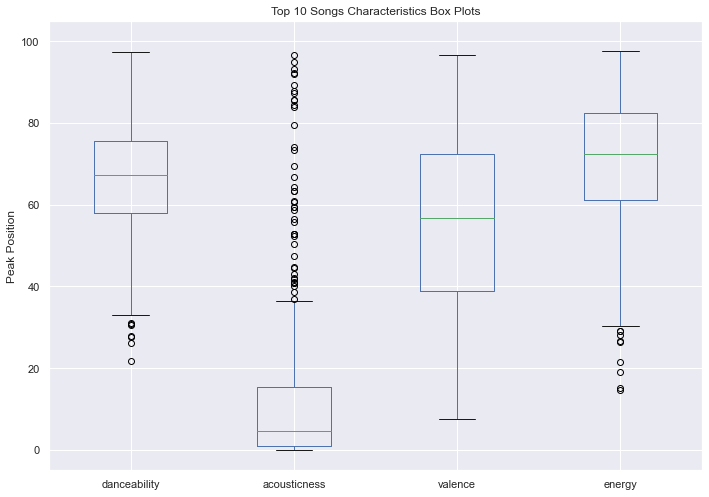

In [308]:
top10[['danceability', 'acousticness', 'valence', 'energy']].plot.box()
plt.title('Top 10 Songs Characteristics Box Plots')
plt.ylabel('Peak Position')
plt.ylim([-5, 105])
plt.show()

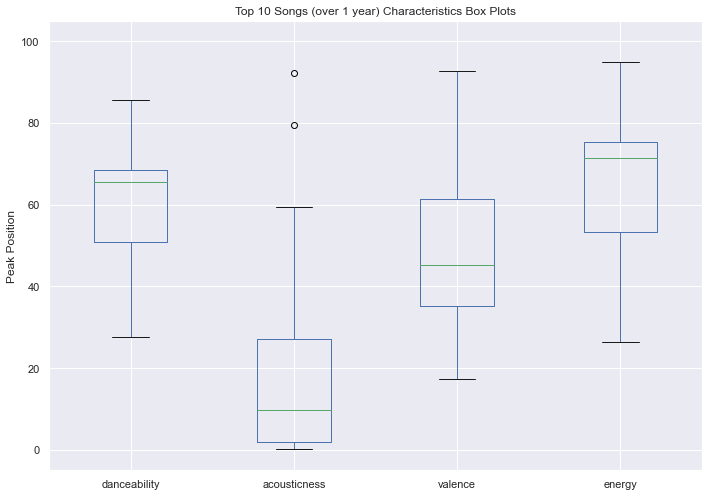

In [309]:
over1year[['danceability', 'acousticness', 'valence', 'energy']].plot.box()
plt.title('Top 10 Songs (over 1 year) Characteristics Box Plots')
plt.ylabel('Peak Position')
plt.ylim([-5, 105])
plt.show()

According to these boxplots, it appears that a song is more likely to be in the top 10 for at least a year if it has higher acousticness. There was not a noticeable difference in danceability, energy, or valence levels, contrary to what we previously thought.

### Evaluation of Significance for Analysis 1, Part 2 (Over 1 year data)

Null Hypothesis: characteristic x and characteristic y are not associated.

Alternative Hypothesis: there is an association between characteristic x and characteristic y.

In [310]:
# Because t-tests require 2 independent samples, we created  new datasets to prevent overlap between the two categories.
under1year = top10[top10["total_charting_weeks"] < 52]

In [311]:
cat1 = under1year['acousticness']
cat2 = over1year['acousticness']
print("T Test P-Value: " , ttest_ind(cat1, cat2)[1])

T Test P-Value:  0.004882640159695037


Given that the p-value for acousticness is .05, we can reject the null hypothesis. Thus, it is clear that a song's acousticness has an affect on whether or not it lasts on the top 10 for a year or more.

In [312]:
cat1 = under1year['danceability']
cat2 = over1year['danceability']
print("T Test P-Value: " , ttest_ind(cat1, cat2)[1])
# High p value

T Test P-Value:  0.05704086786924529


In [313]:
cat1 = under1year['energy']
cat2 = over1year['energy']
print("T Test P-Value: " , ttest_ind(cat1, cat2)[1])

T Test P-Value:  0.10532651878013262


In [314]:
cat1 = under1year['valence']
cat2 = over1year['valence']
print("T Test P-Value: " , ttest_ind(cat1, cat2)[1])

T Test P-Value:  0.19460102291537265


Given that the p-values for danceability, energy, and valence are greater than .05, we fail to reject the null hypothesis. Thus, our T Test does not provide sufficient evidence to conclude that there is a relationship between these characteristics and whether or not a song lasts over 1 year on the top 10.

#### Limitations of Significance Metrics for Analysis 1: Parts 1 & 2

- The pairs of datasets we compared are of significantly different sizes. For example, in the first part, top10 and not_top10 are not the same size. Furthermore, in the second part, under1year and over1year are also not the same size.
- The p-value does not measure the importance of each attribute in determining whether a song is in the top 10; rather, it simply indicates that there is evidence of an association.
- We only looked at certain characteristics. Other characteristics might have been significant in determining the charting position of a song.
- The p-value does not tell us the direction of the association, but we assumed these based on our clustering data

___

## Analysis #2: Linear Regression Model 

In Analysis #2, we sought to answer the second set of questions in our preregistered analyses:

How is number of weeks on the Billboard Hot 100 chart correlated to highest position on the Hot 100?
Is Spotify track popularity correlated to the Billboard charting position?

We decided to perform linear regression to determine the answers to these questions.

### Part 1: Weeks on chart vs. peak position

To determine whether the number of weeks on the Billboard Hot 100 chart and highest position on the Hot 100 are correlated, we performed linear regression on `total_charting_weeks` and `peak_position`.

In [315]:
# Linear regression definition
def lin_reg(x, y, df):
    regressor = LinearRegression()
    regressor.fit(df[ [x] ], df[y])
    y_pred = regressor.predict(df[[x]])
    plt.scatter(data = df, x = x, y = y, alpha = 0.2)
    plt.plot(df[x], y_pred, c='red')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.ylim([-5,105])
    plt.title("Regression Model between "+ x + " and "+ y)
    print('Estimated slope: ', regressor.coef_.round(2))
    print('Estimated intercept: ', regressor.intercept_.round(2)) 
    print("Score: ", regressor.score(df[[x]], df[y]).round(2))
    plt.show()

Estimated slope:  [-2.]
Estimated intercept:  75.89
Score:  0.55


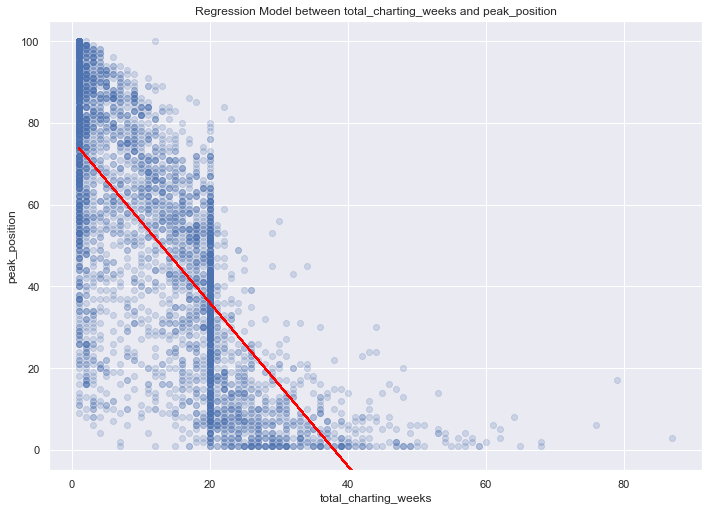

In [316]:
line_reg_graph = lin_reg("total_charting_weeks", "peak_position", df)

For approximately every 2 week increase in `total_charting_weeks`, `peak_position` advances by 1 position on the Billboard Chart (moves down one position).

### Part 2: Popularity vs. peak position

To determine whether Spotify's measurement of popularity and highest position on the Hot 100 are correlated, we performed linear regression on `popularity` and `peak_position`.

Estimated slope:  [-0.98]
Estimated intercept:  103.62
Score:  0.19


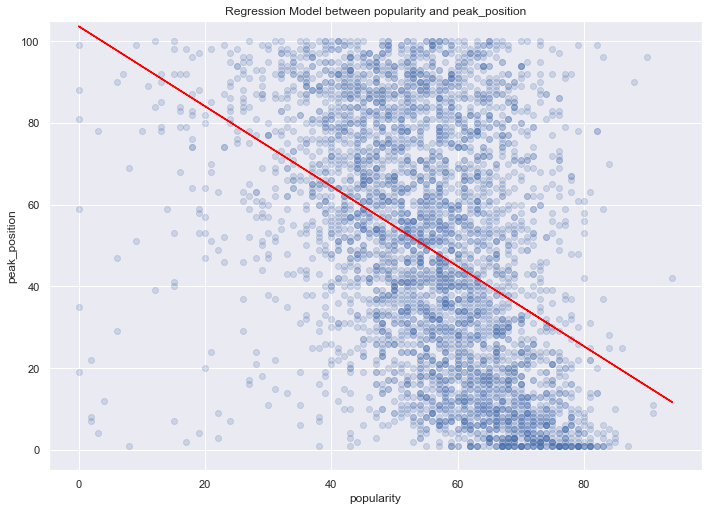

In [317]:
lin_reg("popularity", "peak_position", df)

For approximately every .98 unit increase in `popularity`, `peak_position` advances by 1 position on the Billboard Chart (moves down one position).

## Evaluation of Significance for Analysis 2

Null Hypothesis: characteristic x and characteristic y are not associated.

Alternative Hypothesis: there is an association between characteristic x and characteristic y.

### Part 1: Weeks on Chart vs. Peak Position

In [318]:
cat1 = df['total_charting_weeks']
cat2 = df['peak_position']
print("T Test P-Value: " , ttest_ind(cat1, cat2)[1])

T Test P-Value:  0.0


### Part 2: Popularity vs. Peak Position

In [319]:
cat1 = df['popularity']
cat2 = df['peak_position']
print("T Test P-Value: " , ttest_ind(cat1, cat2)[1])

T Test P-Value:  9.999464630607204e-37


Given that the p-values for weeks on chart vs. peak position and popularity vs. peak position are less than .05, and extremely close to 0, we can reject the null hypothesis. Thus, our T Test provided sufficient evidence to conclude that there is a relationship between weeks on chart and peak position, and additionally between popularity and peak position.

#### Limitations of Significance Metrics for Analysis 2: Parts 1 & 2

- The p-value does not measure the importance of each attribute in determining whether a song is in the top 10; rather, it simply indicates that there is evidence of an association.
- The p-value does not tell us the direction of the association, but we assumed these based on our clustering data
- We are looking at a limited number of years (2005-2015)
- The popularity we are looking at is limited to a small subset (Spotify users)

___

## Limitations

There are several limitations with our exploratory data analysis. Firstly, we exclusively analyzed Hot 100 singles data from 2005 to 2015 so that our results would be as concise and straightforward as possible. However, because of this, we cannot make inferences about “what produces a hit” across a wider range of years; the identified “trends” in the weekly Hot 100 singles between 2005 to 2015 may not be reflected across other subsets of years. Secondly, while the Spotify dataset provided interesting characteristics for analysis, it leaves out some other audio features that top 10 songs may also have in common. For example, do the top 10 songs contain more repetition than the average song? Do these songs follow a unique song structure? Not to mention, the Billboard dataset specifically provides charting data within the United States, not other countries. Thus, our results are only applicable to the United States. Finally, our analysis is based on Spotify data which is highly subjective, narrowing down the scope of our research and affecting our results heavily. Other streaming platforms might measure songs’ characteristics differently. Therefore, our analysis only reflects a certain subset of data. If we were to redo this research analysis using Apple Music, Tidal, or SoundCloud data, our results would undoubtedly be different. Though we answered the question of “what makes a hit,” we have only answered it based on a limited subset of data and characteristics. 

Furthermore, the conclusion drawn from our research may be “harmful” in the sense that it may encourage a lack of individuality amongst artists. Artists may feel as though they need to integrate certain musical characteristics within their music in order to achieve commercial success. While the popularity of a song can be affected positively by certain characteristics, this does not mean that including these will guarantee a hit. 


___

## Conclusion
So, what exactly makes a hit?

The short answer is: <em>it varies</em>.

The long answer is:

We can’t say for sure, but after conducting multiple analyses, we have narrowed it down to multiple promising characteristics. What makes a quick hit? Exactly what you’d expect: danceability and valence, which essentially means happy-go-lucky dance music (think: “Sexy Back” by Justin Timberlake or  "Give It To Me" by Timbaland ft. Nelly Furtado, Justin Timberlake). What makes a long-term hit? Surprisingly, acousticness! Although acousticness was not a prominent feature of many top 10 songs in our analysis of the entire dataset, it turns out that when narrowing down the scope of our data to only those songs that lasted over a year on the top 10, acousticness is key (think: “Hello” by Adele or “All of Me” by John Legend). 

Why? Here’s what we think:

Happy dance music is catchy. It gets you pumped, and ready to tackle any obstacle that comes before you, so it makes sense that it would peak quickly. But... it lacks substance. Most electronic dance music lacks meaningful lyrics, because they are structured around their instrumental/digital composition. Furthermore, because these songs primarily focus on the beat, they’re hard to sing along to on a daily basis. Contrastingly, high acousticness leaves a lot of room for meaningful lyrics, highlighting them instead of obscuring them. Additionally, songs with high acousticness tend to showcase a wider vocal range, one that doesn’t get boring quickly. 

<strong> Wider vocal range + catchy, yet somewhat meaningful lyrics = the perfect sing-along session (especially in the car or in your shower) </strong>

Also, unsurprisingly, Spotify’s measurement of popularity and the weeks that a song spends on the chart are correlated with a song’s peak position on the Hot 100 chart. Spotify’s popularity score is based on user streams. The amount of weeks that a song spends on the Billboard chart is also determined by streams, alongside sales and radio play. Since these factors are largely determined by the amount of streams by listeners, it’s clear that as we have a lot of say in what sticks. 

However, it’s not always consistent. For instance, our taste in music has (hopefully) changed since the year 2005. Every year, a new artist becomes the next big thing, and a new genre can take over the charts. Thus, even though our analysis of musical characteristics was thorough, there really is no formula to commercial music success. There are external factors that play into popularity: artist popularity, labels, advertisements, concerts, festivals, explicitness, the list goes on. In other words, valence, danceability, and acousticness aren’t going to ultimately determine what makes it or breaks it.

So what’s the common denominator? <strong> Us, the listeners.</strong> We have a lot of say in what sticks, so ultimately, we decide what becomes a hit. 

___

## Acknowledgements

- [Wikipedia Page on Billboard Hot 100](https://en.wikipedia.org/wiki/Billboard_Hot_100#:~:text=The%20Billboard%20Hot%20100%20is,streaming%20in%20the%20United%20States)
- [Data World](https://data.world/kcmillersean/billboard-hot-100-1958-2017/workspace/file?filename=Hot+Stuff.csv)
- [Spotify API Documentation](https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-audio-features)
- Professor Wilkens, for providing us with the knowledge necessary to tackle this project

___

## Appendix

- "cleaned.csv" is our cleaned data
- "data_cleaning_2950proj.ipynb" is our data cleaning notebook.